In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Paso 1: Definir Función Analógica

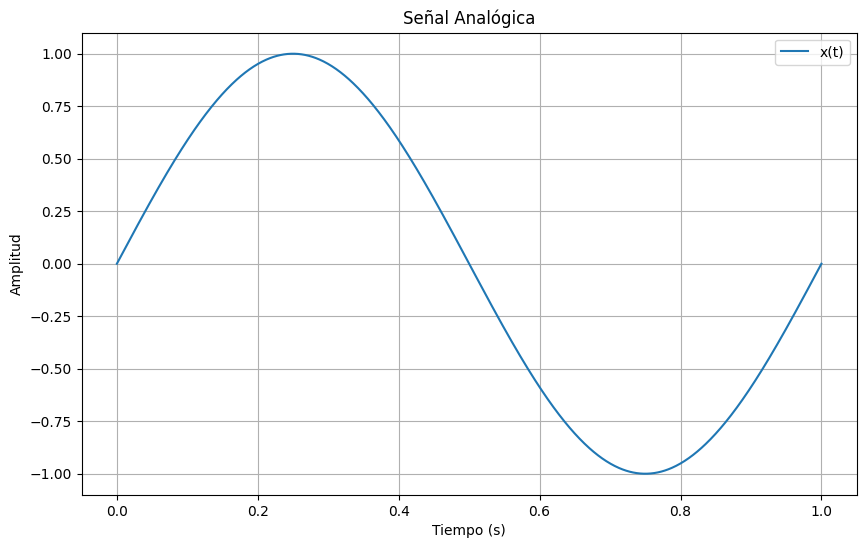

In [ ]:
def funcion_analogica(t):
    return np.sin(2 * np.pi * 1 * t)                                              # Ejemplo: función seno

t = np.linspace(0, 1, 1000)                                                       # Usa la funcion numpy.linspace(start, stop, num) para generar un array de num cantidad de muestras en el intervalo [Start,Stop].
analog_signal = funcion_analogica(t)                                              # Se usa la función analogica creada y se calcula su amplitud para cada muestra, el resultado es un array de puntos que se usa para esbozar la señal analogica en cuestion.

plt.figure(figsize=(10, 6))
plt.plot(t, analog_signal, label="x(t)")
plt.title("Señal Analógica")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

plt.savefig("grafica_señal_analogica.pdf", format="pdf")
plt.show()

Paso 2: Definir Señal Discreta

Concidera el Teorema de muestro:

$ f_{s} \geq 2f_{max}$

Si la funcion escogida fue $x_{(t)} = sin(2\pi t) $ entonces:

$ f_{s} \geq 2$ $Hz$



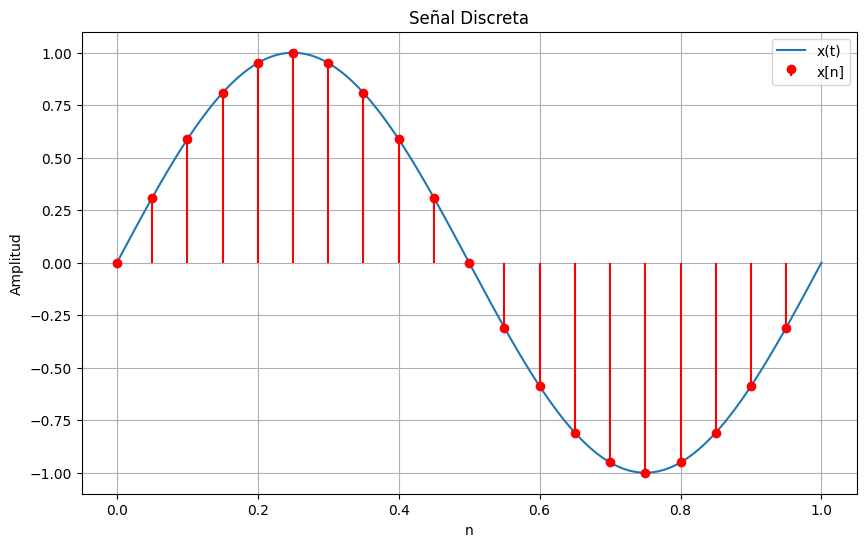

In [ ]:
frecuencia_muestreo = 20                                                         # Define la frecuencia de muestreo en Hz.
periodo_muestreo = 1 / frecuencia_muestreo                                       # Define el periodo de muestreo en seg. Si fs = 10 Hz, Ts = 0.1
n = np.arange(0, 1, periodo_muestreo)                                            # Usa la funcion numpy.arange([start, ]stop, [step]) para obtener un array con los tiempos de muestreo. El array de [Start, Stop). Incluso si el punto final no esta inclusido el error puede tratarse al aumentar la frecuencia de muestreo.
signal_muestreada = funcion_analogica(n)                                         # Se muestrea y se genera la secuancia discreta x[n]

plt.figure(figsize=(10, 6))
plt.plot(t, analog_signal, label="x(t)")
plt.stem(n, signal_muestreada, linefmt='r', markerfmt='ro', basefmt=" ", label="x[n]")   # Usa la funcion matplotlib.pyplot.stem([locs,] heads) para generar un diagrama de líneas perpendiculares en cada ubicación (locs) desde referencia hasta las cabezas (heads), y coloca un marcador allí.
plt.title("Señal Discreta")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

plt.savefig("grafica_señal_discreta.pdf", format="pdf")
plt.show()

Paso 3: Intervalos y Niveles de Cuantización

In [ ]:
niveles_cuantificacion = 8                                                         # Define Número de niveles de cuantificación con ciderando los respectivos errores y futuros bits de condificación.
amplitud_pp = abs(np.min(analog_signal))+np.max(analog_signal )                    # Amplitud pico a pico de la señal
intervalo_cuantificacion = (amplitud_pp) / (niveles_cuantificacion)

niveles = np.linspace( (np.min(analog_signal) + intervalo_cuantificacion / 2),     # Con la funcion numpy.linspace genera los nivel de cuantificacion centrados en los intervalos. Comineza del intervalo inferios y culmina en el superior. La adición restep permite verificar el espaciado de cada nivel.
                      (np.max(analog_signal) - intervalo_cuantificacion / 2),
                      niveles_cuantificacion, retstep=False)

Paso 4: Señal Cuantificada

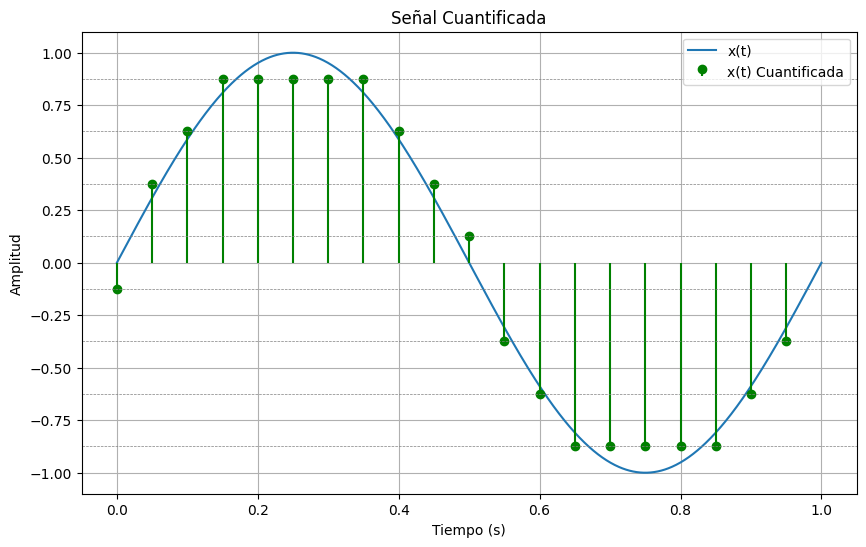

In [ ]:
signal_cuantificada = np.array([niveles[np.argmin(np.abs(niveles - muestra))] for muestra in signal_muestreada])   # Se concruye un array con las amplitudes de la señal cuantificada. Para una muestra se calcula la diferencia absoluta que hay con respecto cada nivel
                                                                                                                   # Se crea un array provicional que contiene las diferencias en el mismo orden del array de niveles. La función numpy.argmin(a) busca la diferencia minima
                                                                                                                   # y regresa el indice. Como el array de diferencias y el del niveles tiene pocisiones correspondientes basta con saber el indice anterior para concluir
                                                                                                                   # a que nivel corresponde la muestra analizada. El proceso anterior se repite para cada muestra de la señal discreta.


plt.figure(figsize=(10, 6))
plt.plot(t, analog_signal, label="x(t)")
plt.stem(n, signal_cuantificada, linefmt='g', markerfmt='go', basefmt=" ", label="x(t) Cuantificada")
for nivel in niveles:
    plt.axhline(y=nivel, color='gray', linestyle='--', linewidth=0.5)                                              # Se crean linea de axis para represantar los nivel de cuantización.
plt.title("Señal Cuantificada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()


plt.savefig("grafica_señal_cuantificada.pdf", format="pdf")
plt.show()

Paso 5: Codificación Binaria

In [ ]:
bits_por_nivel = int(np.ceil(np.log2(niveles_cuantificacion)))                    # Calcula la cantidad de bits por nivel. Se resuelve la potencia de 2 y la funcion numpy.ceil(x) resultado se aproxima hacia arriba al número entero más cercano. Esto asegura que el número de bits sea suficiente para representar cualquier valor.


signal_digital = [format(i, f'0{bits_por_nivel}b') for i in np.digitize(signal_cuantificada, niveles) - 1]  # Se forma un array de cada valor de la señal cuantificada ha sido convertido a una cadena binaria de n bits que representa su nivel de cuantificación. Primero se crea un array numpy.digitize(x, bins, right=False) para devuelve los índices de los bins a los que pertenece cada valor de la matriz de entrada.
                                                                                                            # Como la funcion trabaja por intervalos el indice devuelto siempre sera mayor al verdadero por una unidad, entonces es necesario restar esa unidad.
                                                                                                            # Ahora los valores de la señal cuantificada se codificaron en decimales. Con el comando format () pasamos cada elemento decimal a binario, pero lo que resulta es un string y no un numero.
                                                                                                            # El string format f'0{bits_por_nivel}b cómo debe ser el formato: ahora significa que se debe llenar con ceros a la izquierda (0), y que el número debe tener exactamente bits_por_nivel dígitos binarios (b).
                                                                                                            # print(signal_digital)

Paso 6: Señal Digital

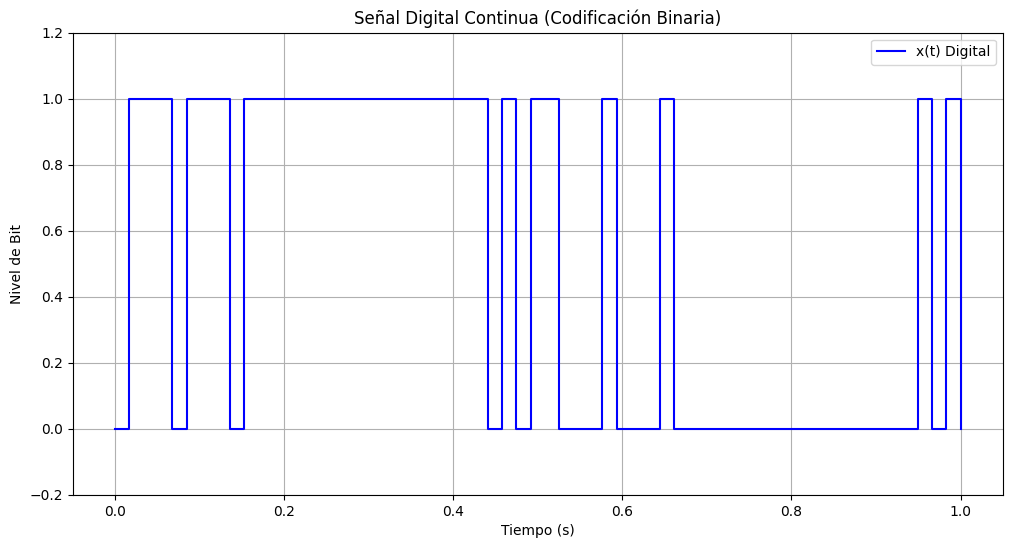

In [ ]:
signal_digital_continua = ''.join(signal_digital)                                 # El comando join(x) combia todas las cadenas binarias en una unica cadena continua. '' es una cadena vacía que indica que no se debe añadir ningún separador entre los elementos de la lista.

t_digital = np.linspace(0, len(signal_digital_continua)*periodo_muestreo/bits_por_nivel, len(signal_digital_continua))  # La funcion linspace genera un array de tiempo de cero al tiempo final de la cadena de bits. Este tiempo viene de una regla de tres: Si en cada periodo de muestro se generan n bits por nivel ¿Cuanto tiempo le toma a la cadena entera formarse?
                                                                                                                        # El numero de puntos debe concidir con el numero de bits de la cadena continua
bitstream_digital = np.array([int(bit) for bit in signal_digital_continua])                                             # Como la señal digial es un string debe ser pasada a enteros para poder trabajada. Cada elemento de la cadena pasa a ser un entero que se almacena en un array.

plt.figure(figsize=(12, 6))
plt.step(t_digital, bitstream_digital, where='post', color='b', label="x(t) Digital")
plt.title("Señal Digital Continua (Codificación Binaria)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Nivel de Bit")
plt.ylim(-0.2, 1.2)
plt.grid(True)
plt.legend()

plt.savefig("grafica_señal_digital.pdf", format="pdf")
plt.show()